<u><b>Research Question - Can we predict, if a dog/cat can be adopted from USA's largest shelter home in 1 month, given their color, breed, sex , intake age, intake condition and intake type.

In [1]:
#import required packages

import pandas as pd
import numpy as np
from collections import defaultdict
import datetime
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt2
import scipy.stats as ss
from imblearn.over_sampling import SMOTE
from sklearn import tree
from sklearn.metrics import *
from sklearn.naive_bayes import *
from sklearn import linear_model

<b>Data Collection:

The data was collected from below mentioned link as public/open data -
https://www.kaggle.com/aaronschlegel/austin-animal-center-shelter-intakes-and-outcomes?select=aac_outcomes.csv

In [2]:
#read austin animal shelter data

df_intakes = pd.read_csv('aac_Intakes.csv')
df_outcomes = pd.read_csv('aac_Outcomes.csv')

In [3]:
#detail of animal intakes

df_intakes.head()

,animal_id,name,animal_type,breed,color,datetime,datetime2,found_location,intake_condition,intake_type,sex_upon_intake,age_upon_intake
0,A706918,Belle,Dog,English Springer Spaniel,White/Liver,2015-07-05T12:59:00.000,2015-07-05T12:59:00.000,9409 Bluegrass Dr in Austin (TX),Normal,Stray,Spayed Female,8 years
1,A724273,Runster,Dog,Basenji Mix,Sable/White,2016-04-14T18:43:00.000,2016-04-14T18:43:00.000,2818 Palomino Trail in Austin (TX),Normal,Stray,Intact Male,11 months
2,A665644,NaN,Cat,Domestic Shorthair Mix,Calico,2013-10-21T07:59:00.000,2013-10-21T07:59:00.000,Austin (TX),Sick,Stray,Intact Female,4 weeks
3,A682524,Rio,Dog,Doberman Pinsch/Australian Cattle Dog,Tan/Gray,2014-06-29T10:38:00.000,2014-06-29T10:38:00.000,800 Grove Blvd in Austin (TX),Normal,Stray,Neutered Male,4 years
4,A743852,Odin,Dog,Labrador Retriever Mix,Chocolate,2017-02-18T12:46:00.000,2017-02-18T12:46:00.000,Austin (TX),Normal,Owner Surrender,Neutered Male,2 years


In [4]:
#details of animal outcomes

df_outcomes.head()

,animal_id,name,animal_type,breed,color,date_of_birth,datetime,monthyear,outcome_subtype,outcome_type,sex_upon_outcome,age_upon_outcome
0,A684346,NaN,Cat,Domestic Shorthair Mix,Orange Tabby,2014-07-07T00:00:00,2014-07-22T16:04:00,2014-07-22T16:04:00,Partner,Transfer,Intact Male,2 weeks
1,A666430,Lucy,Dog,Beagle Mix,White/Brown,2012-11-06T00:00:00,2013-11-07T11:47:00,2013-11-07T11:47:00,Partner,Transfer,Spayed Female,1 year
2,A675708,*Johnny,Dog,Pit Bull,Blue/White,2013-03-31T00:00:00,2014-06-03T14:20:00,2014-06-03T14:20:00,NaN,Adoption,Neutered Male,1 year
3,A680386,Monday,Dog,Miniature Schnauzer Mix,White,2005-06-02T00:00:00,2014-06-15T15:50:00,2014-06-15T15:50:00,Partner,Transfer,Neutered Male,9 years
4,A683115,NaN,Other,Bat Mix,Brown,2014-01-07T00:00:00,2014-07-07T14:04:00,2014-07-07T14:04:00,Rabies Risk,Euthanasia,Unknown,5 months


In [5]:
df_intakes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80187 entries, 0 to 80186
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   animal_id         80187 non-null  object
 1   name              55603 non-null  object
 2   animal_type       80187 non-null  object
 3   breed             80187 non-null  object
 4   color             80187 non-null  object
 5   datetime          80187 non-null  object
 6   datetime2         80187 non-null  object
 7   found_location    80187 non-null  object
 8   intake_condition  80187 non-null  object
 9   intake_type       80187 non-null  object
 10  sex_upon_intake   80186 non-null  object
 11  age_upon_intake   80187 non-null  object
dtypes: object(12)
memory usage: 7.3+ MB


In [6]:
df_outcomes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80681 entries, 0 to 80680
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   animal_id         80681 non-null  object
 1   name              56116 non-null  object
 2   animal_type       80681 non-null  object
 3   breed             80681 non-null  object
 4   color             80681 non-null  object
 5   date_of_birth     80681 non-null  object
 6   datetime          80681 non-null  object
 7   monthyear         80681 non-null  object
 8   outcome_subtype   36893 non-null  object
 9   outcome_type      80667 non-null  object
 10  sex_upon_outcome  80679 non-null  object
 11  age_upon_outcome  80673 non-null  object
dtypes: object(12)
memory usage: 7.4+ MB


<b>Data Cleaning:

Check for missing values

In [7]:
df_outcomes.isna().sum()

animal_id               0
name                24565
animal_type             0
breed                   0
color                   0
date_of_birth           0
datetime                0
monthyear               0
outcome_subtype     43788
outcome_type           14
sex_upon_outcome        2
age_upon_outcome        8
dtype: int64

In [8]:
df_outcomes.outcome_subtype.value_counts()

Partner                20082
Foster                  5714
SCRP                    3211
Suffering               2563
Rabies Risk             2546
Snr                      755
Aggressive               508
Offsite                  367
In Kennel                354
Medical                  268
In Foster                183
Behavior                 142
At Vet                    71
Enroute                   49
Underage                  28
Court/Investigation       23
In Surgery                17
Possible Theft             9
Barn                       3
Name: outcome_subtype, dtype: int64

In [9]:
df_outcomes.outcome_type.value_counts()

Adoption           34232
Transfer           24050
Return to Owner    14851
Euthanasia          6289
Died                 699
Disposal             304
Rto-Adopt            179
Missing               47
Relocate              16
Name: outcome_type, dtype: int64

We only need outcome type for our analysis further so we can drop outcome_subtype with ~50% missing values. We do not need to impute this column as its not required for our research further. So, dropping it will be a good idea to handle its missing values.

In [10]:
df_outcomes.drop(columns = ['outcome_subtype'], inplace = True)

In [11]:
df_outcomes.isna().sum()

animal_id               0
name                24565
animal_type             0
breed                   0
color                   0
date_of_birth           0
datetime                0
monthyear               0
outcome_type           14
sex_upon_outcome        2
age_upon_outcome        8
dtype: int64

Dropping rows with with no name can impact the data. Also, this column may be required later. So, imputing the null values with 'no name'.

In [12]:
df_outcomes["name"].fillna("no name", inplace = True) 

In [13]:
df_outcomes.isna().sum()

animal_id            0
name                 0
animal_type          0
breed                0
color                0
date_of_birth        0
datetime             0
monthyear            0
outcome_type        14
sex_upon_outcome     2
age_upon_outcome     8
dtype: int64

Rows that do not have an outcome type, will not be useful for our analysis. Also, compared to the total number of rows, 14 rows are pretty less and dropping them will not impact the dataset. Also, Sex_upon_outcome just have a row with a null value, so we can drop it.

In [14]:
df_outcomes.dropna(subset = ['outcome_type','sex_upon_outcome'], inplace = True)

In [15]:
df_outcomes.isna().sum()

animal_id           0
name                0
animal_type         0
breed               0
color               0
date_of_birth       0
datetime            0
monthyear           0
outcome_type        0
sex_upon_outcome    0
age_upon_outcome    6
dtype: int64

In [16]:
df_outcomes.age_upon_outcome.unique()

array(['2 weeks', '1 year', '9 years', '5 months', '4 months', '1 month',
       '3 months', '2 years', '2 months', '4 years', '3 weeks',
       '8 months', '12 years', '7 years', '3 years', '6 years', '5 days',
       '10 months', '4 weeks', '2 days', '10 years', '14 years',
       '5 years', '8 years', '6 months', '11 months', '15 years',
       '13 years', '11 years', '16 years', '3 days', '7 months',
       '9 months', '6 days', '4 days', '5 weeks', '1 week', '1 day',
       '1 weeks', '17 years', '0 years', '18 years', '20 years',
       '19 years', '22 years', '25 years', nan], dtype=object)

We need to convert ages to numerical values with units as days, so that we can impute age for null values.

In [17]:
def age_in_days_int(age):
    """
    This function will convert age in months/years/weeks/days to days.
    """
    if 'years' in str(age):
        age=age.replace(' years', '')
        age=int(age)
        age=age*365
        
    elif 'year' in str(age):
        age=age.replace(' year', '')
        age=int(age)
        age=age*365
        
    elif 'months' in str(age):
        age=age.replace(' months', '')
        age=float(age)
        age=age*30
        
    elif 'month' in str(age):
        age=age.replace(' month', '')
        age=float(age)
        age=age*30
        
    elif 'weeks' in str(age):
        age=age.replace(' weeks', '')
        age=int(age)
        age=age*7
        
    elif 'week' in str(age):
        age=age.replace(' week', '')
        age=int(age)
        age=age*7
    
    elif 'days' in str(age):
        age=age.replace(' days', '')
        age=int(age)

    elif 'day' in str(age):
        age=age.replace(' day', '')
        age=int(age)
        
    return age
        

In [18]:
df_outcomes['age_upon_outcome'] = df_outcomes['age_upon_outcome'].apply(age_in_days_int)

In [19]:
df_outcomes['age_upon_outcome'].unique()

array([1.400e+01, 3.650e+02, 3.285e+03, 1.500e+02, 1.200e+02, 3.000e+01,
       9.000e+01, 7.300e+02, 6.000e+01, 1.460e+03, 2.100e+01, 2.400e+02,
       4.380e+03, 2.555e+03, 1.095e+03, 2.190e+03, 5.000e+00, 3.000e+02,
       2.800e+01, 2.000e+00, 3.650e+03, 5.110e+03, 1.825e+03, 2.920e+03,
       1.800e+02, 3.300e+02, 5.475e+03, 4.745e+03, 4.015e+03, 5.840e+03,
       3.000e+00, 2.100e+02, 2.700e+02, 6.000e+00, 4.000e+00, 3.500e+01,
       7.000e+00, 1.000e+00, 6.205e+03, 0.000e+00, 6.570e+03, 7.300e+03,
       6.935e+03, 8.030e+03, 9.125e+03,       nan])

In [20]:
#imputing age null values with mean of their breed group

df_outcomes['age_upon_outcome'] = df_outcomes[['age_upon_outcome']].fillna(df_outcomes.groupby('breed').transform('mean'))

In [21]:
df_outcomes.isna().sum()

animal_id           0
name                0
animal_type         0
breed               0
color               0
date_of_birth       0
datetime            0
monthyear           0
outcome_type        0
sex_upon_outcome    0
age_upon_outcome    1
dtype: int64

In [22]:
df_outcomes[df_outcomes.age_upon_outcome.isnull()]

,animal_id,name,animal_type,breed,color,date_of_birth,datetime,monthyear,outcome_type,sex_upon_outcome,age_upon_outcome
80344,A768766,no name,Bird,Guinea,Gray,2017-03-24T00:00:00,2018-03-29T11:59:00,2018-03-29T11:59:00,Transfer,Unknown,NaN


In [23]:
df_outcomes[df_outcomes.breed == 'Guinea']

,animal_id,name,animal_type,breed,color,date_of_birth,datetime,monthyear,outcome_type,sex_upon_outcome,age_upon_outcome
80344,A768766,no name,Bird,Guinea,Gray,2017-03-24T00:00:00,2018-03-29T11:59:00,2018-03-29T11:59:00,Transfer,Unknown,NaN


In [24]:
#as only 1 row with null age value with no another row as same breed, so we can drop it 
df_outcomes.dropna(subset = ['age_upon_outcome'],inplace = True)

In [25]:
df_outcomes.isna().sum()

animal_id           0
name                0
animal_type         0
breed               0
color               0
date_of_birth       0
datetime            0
monthyear           0
outcome_type        0
sex_upon_outcome    0
age_upon_outcome    0
dtype: int64

So, we are done with missing values in outcomes dataframe.

Datetime and monthyear are duplicate columns. Check their duplicate rows and remove one of the columns.

In [26]:
print(df_outcomes['datetime'].equals(df_outcomes['monthyear']))

True


In [27]:
df_outcomes.drop(columns = ['monthyear'], inplace = True)

Convert date_of_birth and datetime to datetime object datatype.

In [28]:
df_outcomes['datetime'] = pd.to_datetime(df_outcomes['datetime'])
df_outcomes['date_of_birth'] = pd.to_datetime(df_outcomes['date_of_birth'])
df_outcomes['age_upon_outcome'] = df_outcomes['age_upon_outcome'].astype(int)

In [29]:
df_outcomes.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 80665 entries, 0 to 80680
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   animal_id         80665 non-null  object        
 1   name              80665 non-null  object        
 2   animal_type       80665 non-null  object        
 3   breed             80665 non-null  object        
 4   color             80665 non-null  object        
 5   date_of_birth     80665 non-null  datetime64[ns]
 6   datetime          80665 non-null  datetime64[ns]
 7   outcome_type      80665 non-null  object        
 8   sex_upon_outcome  80665 non-null  object        
 9   age_upon_outcome  80665 non-null  int32         
dtypes: datetime64[ns](2), int32(1), object(7)
memory usage: 6.5+ MB


In [30]:
df_outcomes['animal_type'].unique()

array(['Cat', 'Dog', 'Other', 'Bird', 'Livestock'], dtype=object)

As we will be performing analysis for dogs and cats, so let us drop all other rows from the dataset.

In [31]:
df_outcomes = df_outcomes[(df_outcomes['animal_type'] == 'Dog') | (df_outcomes['animal_type'] == 'Cat')]

In [32]:
df_outcomes.shape

(75876, 10)

In [33]:
df_outcomes['animal_type'].unique()

array(['Cat', 'Dog'], dtype=object)

So, we are done with cleaning for outcome dataset. Now, we will clean intake dataset similary.

Now, cleaning the animals intake dataframe as follows - <br>
We should deal with missing values first:

In [34]:
df_intakes.isna().sum()

animal_id               0
name                24584
animal_type             0
breed                   0
color                   0
datetime                0
datetime2               0
found_location          0
intake_condition        0
intake_type             0
sex_upon_intake         1
age_upon_intake         0
dtype: int64

Imputing values for name column and dropping null valued row for sex_upon intake -

In [35]:
df_intakes["name"].fillna("no name", inplace = True) 
df_intakes.dropna(subset = ['sex_upon_intake'], inplace = True)

In [36]:
df_intakes.isna().sum()

animal_id           0
name                0
animal_type         0
breed               0
color               0
datetime            0
datetime2           0
found_location      0
intake_condition    0
intake_type         0
sex_upon_intake     0
age_upon_intake     0
dtype: int64

Checking if datetime and datetime2 are duplicate columns. Remove one among them. Also, work on datatypes of columns of animals intake dataframe:

In [37]:
print(df_intakes['datetime'].equals(df_intakes['datetime2']))

True


In [38]:
df_intakes.drop(columns = ['datetime2'], inplace = True)

In [39]:
df_intakes.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 80186 entries, 0 to 80186
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   animal_id         80186 non-null  object
 1   name              80186 non-null  object
 2   animal_type       80186 non-null  object
 3   breed             80186 non-null  object
 4   color             80186 non-null  object
 5   datetime          80186 non-null  object
 6   found_location    80186 non-null  object
 7   intake_condition  80186 non-null  object
 8   intake_type       80186 non-null  object
 9   sex_upon_intake   80186 non-null  object
 10  age_upon_intake   80186 non-null  object
dtypes: object(11)
memory usage: 7.3+ MB


In [40]:
df_intakes['datetime'] = pd.to_datetime(df_intakes['datetime'])
df_intakes['age_upon_intake'].unique()

array(['8 years', '11 months', '4 weeks', '4 years', '2 years',
       '5 months', '14 years', '1 month', '2 months', '18 years',
       '4 months', '1 year', '4 days', '1 day', '2 weeks', '3 years',
       '15 years', '6 years', '3 weeks', '6 months', '12 years', '1 week',
       '10 years', '9 years', '7 months', '5 years', '9 months',
       '1 weeks', '8 months', '3 months', '2 days', '7 years', '0 years',
       '10 months', '5 days', '11 years', '13 years', '3 days',
       '17 years', '5 weeks', '19 years', '6 days', '16 years',
       '20 years', '22 years', '25 years'], dtype=object)

In [41]:
df_intakes['age_upon_intake'] = df_intakes['age_upon_intake'].apply(age_in_days_int)
df_intakes['age_upon_intake'] = df_intakes['age_upon_intake'].astype(int)
df_intakes.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 80186 entries, 0 to 80186
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   animal_id         80186 non-null  object        
 1   name              80186 non-null  object        
 2   animal_type       80186 non-null  object        
 3   breed             80186 non-null  object        
 4   color             80186 non-null  object        
 5   datetime          80186 non-null  datetime64[ns]
 6   found_location    80186 non-null  object        
 7   intake_condition  80186 non-null  object        
 8   intake_type       80186 non-null  object        
 9   sex_upon_intake   80186 non-null  object        
 10  age_upon_intake   80186 non-null  int32         
dtypes: datetime64[ns](1), int32(1), object(9)
memory usage: 7.0+ MB


In [42]:
df_intakes = df_intakes[(df_intakes['animal_type'] == 'Dog') | (df_intakes['animal_type'] == 'Cat')]

In [43]:
df_intakes.shape

(75401, 11)

Now, we will merge both dataframes to create a final merged dataframe based on Animal IDs that will be used further for analysis:
<br><b>Data Condensation:

In [44]:
df_merge = pd.merge(df_intakes,df_outcomes,on='animal_id',how='inner')

In [45]:
df_merge.head()

,animal_id,name_x,animal_type_x,breed_x,color_x,datetime_x,found_location,intake_condition,intake_type,sex_upon_intake,age_upon_intake,name_y,animal_type_y,breed_y,color_y,date_of_birth,datetime_y,outcome_type,sex_upon_outcome,age_upon_outcome
0,A706918,Belle,Dog,English Springer Spaniel,White/Liver,2015-07-05 12:59:00,9409 Bluegrass Dr in Austin (TX),Normal,Stray,Spayed Female,2920,Belle,Dog,English Springer Spaniel,White/Liver,2007-07-05,2015-07-05 15:13:00,Return to Owner,Spayed Female,2920
1,A724273,Runster,Dog,Basenji Mix,Sable/White,2016-04-14 18:43:00,2818 Palomino Trail in Austin (TX),Normal,Stray,Intact Male,330,Runster,Dog,Basenji Mix,Sable/White,2015-04-17,2016-04-21 17:17:00,Return to Owner,Neutered Male,365
2,A665644,no name,Cat,Domestic Shorthair Mix,Calico,2013-10-21 07:59:00,Austin (TX),Sick,Stray,Intact Female,28,no name,Cat,Domestic Shorthair Mix,Calico,2013-09-21,2013-10-21 11:39:00,Transfer,Intact Female,28
3,A682524,Rio,Dog,Doberman Pinsch/Australian Cattle Dog,Tan/Gray,2014-06-29 10:38:00,800 Grove Blvd in Austin (TX),Normal,Stray,Neutered Male,1460,Rio,Dog,Doberman Pinsch/Australian Cattle Dog,Tan/Gray,2010-06-29,2014-07-02 14:16:00,Return to Owner,Neutered Male,1460
4,A743852,Odin,Dog,Labrador Retriever Mix,Chocolate,2017-02-18 12:46:00,Austin (TX),Normal,Owner Surrender,Neutered Male,730,Odin,Dog,Labrador Retriever Mix,Chocolate,2015-02-18,2017-02-21 17:44:00,Return to Owner,Neutered Male,730


In [46]:
df_merge.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 95413 entries, 0 to 95412
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   animal_id         95413 non-null  object        
 1   name_x            95413 non-null  object        
 2   animal_type_x     95413 non-null  object        
 3   breed_x           95413 non-null  object        
 4   color_x           95413 non-null  object        
 5   datetime_x        95413 non-null  datetime64[ns]
 6   found_location    95413 non-null  object        
 7   intake_condition  95413 non-null  object        
 8   intake_type       95413 non-null  object        
 9   sex_upon_intake   95413 non-null  object        
 10  age_upon_intake   95413 non-null  int32         
 11  name_y            95413 non-null  object        
 12  animal_type_y     95413 non-null  object        
 13  breed_y           95413 non-null  object        
 14  color_y           9541

As we have lots of repeated columns, we will drop duplicated columns:

In [47]:
df_merge.drop(columns = ['name_y','animal_type_y','breed_y','color_y','sex_upon_outcome'], inplace = True)

In [48]:
df_merge.columns = ['animal_id', 'name', 'animal_type', 'breed', 'color', 'datetime_intake', 'found_location', 'intake_condition',
                   'intake_type', 'sex', 'age_upon_intake', 'date_of_birth', 'datetime_outcome', 'outcome_type','age_upon_outcome']

In [49]:
df_merge.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 95413 entries, 0 to 95412
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   animal_id         95413 non-null  object        
 1   name              95413 non-null  object        
 2   animal_type       95413 non-null  object        
 3   breed             95413 non-null  object        
 4   color             95413 non-null  object        
 5   datetime_intake   95413 non-null  datetime64[ns]
 6   found_location    95413 non-null  object        
 7   intake_condition  95413 non-null  object        
 8   intake_type       95413 non-null  object        
 9   sex               95413 non-null  object        
 10  age_upon_intake   95413 non-null  int32         
 11  date_of_birth     95413 non-null  datetime64[ns]
 12  datetime_outcome  95413 non-null  datetime64[ns]
 13  outcome_type      95413 non-null  object        
 14  age_upon_outcome  9541

To check any duplicate rows in condensed data:

In [50]:
df_merge[df_merge.duplicated()].shape

(44, 15)

In [51]:
df_merge.drop_duplicates(inplace = True)

In [52]:
#to check if duplicate rows were deleted
df_merge[df_merge.duplicated()].shape

(0, 15)

Finally, we got our required cleaned merged dataset to conduct further analysis.

<b>Exploratory Data Analysis:

To plot animal_type for all categies of outcomes:

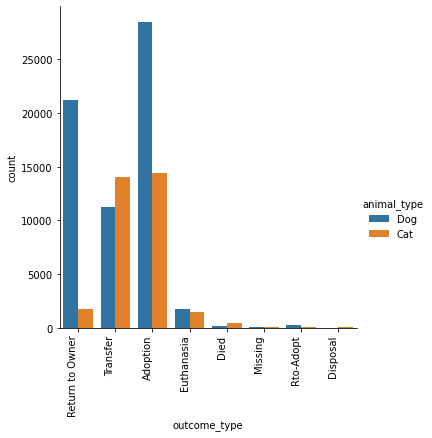

In [53]:
outcome_plot = sns.catplot(x='outcome_type', data=df_merge, kind='count', hue='animal_type')
outcome_plot.set_xticklabels(rotation=90, horizontalalignment='right')

Mostly adopted or returned to owner animals are dogs in comparision to cats. However, cats in transfer category are more than dogs.

We will only be interested in 'Return to Owner', 'Adoption', 'Rto-Adopt' for our analysis as these are the only relevant outcomes in concern to our research question.

In [54]:
df_merge = df_merge[df_merge['outcome_type'].isin(['Return to Owner', 'Adoption', 'Rto-Adopt'])]

In [55]:
df_merge.shape

(66180, 15)

In [57]:
adopted_animals_df = df_merge[df_merge['outcome_type'] == 'Adoption']
#breed_plot = sns.catplot(x='breed', data=adopted_animals_df, kind='count')
#breed_plot.set_xticklabels(rotation=90, horizontalalignment='right')

After, trying to plot above graph for breed I realised there are numerous breeds for both cats and dogs. we might not need to consider all of them

In [58]:
df_merge['breed'].nunique()

1775

In [59]:
df_merge['breed'].value_counts()

Domestic Shorthair Mix                     12533
Pit Bull Mix                                7971
Labrador Retriever Mix                      5292
Chihuahua Shorthair Mix                     4299
German Shepherd Mix                         2221
                                           ...  
Rhod Ridgeback/Plott Hound                     1
Jack Russell Terrier/Manchester Terrier        1
Miniature Pinscher/Maltese                     1
Great Dane/Australian Shepherd                 1
Bull Terrier/Pit Bull                          1
Name: breed, Length: 1775, dtype: int64

In [60]:
df_merge[df_merge['animal_type'] == 'Dog']['breed'].value_counts()[0:15]

Pit Bull Mix                 7971
Labrador Retriever Mix       5292
Chihuahua Shorthair Mix      4299
German Shepherd Mix          2221
Australian Cattle Dog Mix    1175
Boxer Mix                     778
Border Collie Mix             758
Miniature Poodle Mix          715
Dachshund Mix                 713
Rat Terrier Mix               612
Siberian Husky Mix            589
Catahoula Mix                 580
Staffordshire Mix             539
Australian Shepherd Mix       470
Jack Russell Terrier Mix      434
Name: breed, dtype: int64

In [61]:
df_merge[df_merge['animal_type'] == 'Cat']['breed'].value_counts()[0:15]

Domestic Shorthair Mix      12533
Domestic Medium Hair Mix     1299
Domestic Longhair Mix         778
Siamese Mix                   612
Domestic Shorthair            237
American Shorthair Mix        103
Snowshoe Mix                   85
Maine Coon Mix                 84
Domestic Medium Hair           75
Russian Blue Mix               64
Manx Mix                       55
Siamese                        42
Himalayan Mix                  34
Domestic Longhair              30
Persian Mix                    16
Name: breed, dtype: int64

To have a good mixture of dogs and cats, I choose to have 15 dog breeds and top 15 cat breeds.

In [62]:
top_dog_breeds = list(df_merge[df_merge['animal_type'] == 'Dog']['breed'].value_counts().nlargest(n=15).index)
top_cat_breeds = list(df_merge[df_merge['animal_type'] == 'Cat']['breed'].value_counts().nlargest(n=15).index)
top_breeds = top_dog_breeds + top_cat_breeds
top_breeds

['Pit Bull Mix',
 'Labrador Retriever Mix',
 'Chihuahua Shorthair Mix',
 'German Shepherd Mix',
 'Australian Cattle Dog Mix',
 'Boxer Mix',
 'Border Collie Mix',
 'Miniature Poodle Mix',
 'Dachshund Mix',
 'Rat Terrier Mix',
 'Siberian Husky Mix',
 'Catahoula Mix',
 'Staffordshire Mix',
 'Australian Shepherd Mix',
 'Jack Russell Terrier Mix',
 'Domestic Shorthair Mix',
 'Domestic Medium Hair Mix',
 'Domestic Longhair Mix',
 'Siamese Mix',
 'Domestic Shorthair',
 'American Shorthair Mix',
 'Snowshoe Mix',
 'Maine Coon Mix',
 'Domestic Medium Hair',
 'Russian Blue Mix',
 'Manx Mix',
 'Siamese',
 'Himalayan Mix',
 'Domestic Longhair',
 'Persian Mix']

In [63]:
df_merge = df_merge[df_merge['breed'].isin(top_breeds)]

In [64]:
df_merge.shape

(43193, 15)

In [66]:
df_merge.animal_type.value_counts() 

Dog    27146
Cat    16047
Name: animal_type, dtype: int64

In [68]:
df_merge.outcome_type.value_counts() 

Adoption           29649
Return to Owner    13364
Rto-Adopt            180
Name: outcome_type, dtype: int64

In [69]:
df_merge.breed.nunique()

30

Let's check if any of the other nominal features are not having categoeries in abundance like breed had.

In [70]:
df_merge.color.nunique() #it seems to be an issue further, we need to reduce numbe of color categories

350

In [71]:
df_merge.found_location.nunique() #it should also be taken care of as so many categories

16423

In [72]:
df_merge.intake_condition.nunique()

8

In [73]:
df_merge.intake_type.nunique()

4

In [74]:
df_merge.sex.nunique()

5

Working with the found locaton feature in the dataset- 

In [75]:
df_merge.found_location.value_counts()

Austin (TX)                                   9713
Outside Jurisdiction                           758
Travis (TX)                                    529
7201 Levander Loop in Austin (TX)              265
Pflugerville (TX)                              232
                                              ... 
18120 River Timber Drive in Travis (TX)          1
Hwy 290 And Parmer Ln in Travis (TX)             1
9701 Eastwend in Austin (TX)                     1
6306 Fm 1327 in Austin (TX)                      1
Teri Rd. & Nuckols Crossing in Austin (TX)       1
Name: found_location, Length: 16423, dtype: int64

Majority of the animals were found in Austin, Texas, that makes sense as the shelter is located in Austin,Texas. So, its quite expected to have majority of animals from same place. As, found location does not make sense for the outcome variable, so we will drop this column. Logically, found location for an animal does not contributes to its adoption or other outcome values.

In [76]:
df_merge.drop(columns = ['found_location'], inplace = True)

Working with the color feature in the dataset:

In [77]:
df_merge['color'].unique()

array(['Chocolate', 'Black/White', 'Cream Tabby', 'Brown Tabby/White',
       'Torbie', 'Black', 'Blue', 'Tortie', 'Brown Tabby', 'White/Blue',
       'Blue Tabby', 'Yellow', 'White/Black', 'Black/Tan', 'Blue/White',
       'Tan/White', 'Cream/White', 'White/Cream', 'Orange Tabby/White',
       'Brown', 'Black/Brown', 'Tricolor', 'Red/White', 'Lynx Point',
       'White/Brown', 'Brown Brindle', 'Brown/White', 'Blue Cream/White',
       'Black/Black', 'Calico', 'Tan', 'White/Tan', 'Brown/Black',
       'Black/Blue', 'White', 'Orange Tabby', 'Gold/White',
       'Tricolor/White', 'Black Smoke/White', 'Seal Point/White',
       'Tan/Brown', 'Blue Merle', 'Tan/Black', 'Blue Tabby/White', 'Fawn',
       'Sable', 'Red', 'White/Tricolor', 'Calico/White',
       'Black Brindle/White', 'Blue/Tan', 'Blue Cream', 'Gray/White',
       'Seal Point', 'Brown Brindle/White', 'Fawn/White', 'White/Red',
       'Tortie/White', 'Torbie/White', 'Black Smoke', 'Blue Merle/Cream',
       'Buff/White', 'Choco

In [78]:
df_merge[df_merge['animal_type'] == 'Dog']['color'].value_counts()[0:20]

Black/White            3763
Brown/White            1759
Black                  1679
Tan/White              1597
Blue/White             1378
Tan                    1091
White                  1088
Brown Brindle/White    1009
Brown                   990
Tricolor                934
White/Brown             916
White/Black             854
Black/Tan               841
White/Tan               690
Black/Brown             659
Brown/Black             532
Red/White               472
Chocolate/White         451
Yellow                  420
Red                     387
Name: color, dtype: int64

In [79]:
df_merge[df_merge['animal_type'] == 'Cat']['color'].value_counts()[0:20]

Brown Tabby           2325
Black                 1999
Black/White           1474
Brown Tabby/White     1410
Orange Tabby          1132
Calico                 787
Tortie                 687
Orange Tabby/White     676
Blue Tabby             633
Blue                   587
Torbie                 500
Blue/White             450
Blue Tabby/White       348
Lynx Point             280
White/Black            273
Cream Tabby            271
White/Brown Tabby      172
Seal Point             153
Cream Tabby/White      150
Flame Point            139
Name: color, dtype: int64

In [80]:
top_dog_colors = list(df_merge[df_merge['animal_type'] == 'Dog']['color'].value_counts().nlargest(n=20).index)
top_cat_colors = list(df_merge[df_merge['animal_type'] == 'Cat']['color'].value_counts().nlargest(n=20).index)
top_colors = top_dog_colors + top_cat_colors
top_colors

['Black/White',
 'Brown/White',
 'Black',
 'Tan/White',
 'Blue/White',
 'Tan',
 'White',
 'Brown Brindle/White',
 'Brown',
 'Tricolor',
 'White/Brown',
 'White/Black',
 'Black/Tan',
 'White/Tan',
 'Black/Brown',
 'Brown/Black',
 'Red/White',
 'Chocolate/White',
 'Yellow',
 'Red',
 'Brown Tabby',
 'Black',
 'Black/White',
 'Brown Tabby/White',
 'Orange Tabby',
 'Calico',
 'Tortie',
 'Orange Tabby/White',
 'Blue Tabby',
 'Blue',
 'Torbie',
 'Blue/White',
 'Blue Tabby/White',
 'Lynx Point',
 'White/Black',
 'Cream Tabby',
 'White/Brown Tabby',
 'Seal Point',
 'Cream Tabby/White',
 'Flame Point']

In [81]:
df_merge = df_merge[df_merge['color'].isin(top_colors)]
df_merge.shape

(36354, 14)

Finally, I have relevant number of categories in all nominal columns.

In [82]:
#to find number of days animal had been in the shelter
df_merge['time_duration_shelter']=(df_merge['datetime_outcome']-df_merge['datetime_intake'])

In [83]:
#as per analysis we require cases that were adopted in 30days(1 month of intake)

time_threshold = datetime.timedelta(days=30)
df_merge['adoption_in_month']=df_merge['time_duration_shelter'] < time_threshold
df_merge.head()

,animal_id,name,animal_type,breed,color,datetime_intake,intake_condition,intake_type,sex,age_upon_intake,date_of_birth,datetime_outcome,outcome_type,age_upon_outcome,time_duration_shelter,adoption_in_month
5,A708452,Mumble,Dog,Labrador Retriever Mix,Black/White,2015-07-30 14:37:00,Normal,Public Assist,Intact Male,730,2013-07-28,2015-08-04 18:17:00,Return to Owner,730,5 days 03:40:00,True
7,A731435,*Casey,Cat,Domestic Shorthair Mix,Cream Tabby,2016-08-08 17:52:00,Normal,Owner Surrender,Neutered Male,150,2016-02-22,2016-07-29 19:00:00,Adoption,150,-10 days +01:08:00,True
9,A731435,*Casey,Cat,Domestic Shorthair Mix,Cream Tabby,2016-07-22 10:44:00,Normal,Stray,Intact Male,120,2016-02-22,2016-07-29 19:00:00,Adoption,150,7 days 08:16:00,True
14,A657188,Tommy,Cat,Domestic Shorthair Mix,Brown Tabby/White,2013-11-10 17:19:00,Normal,Owner Surrender,Neutered Male,5110,1999-06-24,2013-10-29 11:07:00,Adoption,5110,-13 days +17:48:00,True
15,A657188,Tommy,Cat,Domestic Shorthair Mix,Brown Tabby/White,2013-11-10 17:19:00,Normal,Owner Surrender,Neutered Male,5110,1999-06-24,2014-01-26 16:24:00,Adoption,5110,76 days 23:05:00,False


In [84]:
#dropping columns that will not be useful for the model
df_merge.drop(columns = ['animal_id','name','datetime_intake','date_of_birth','datetime_outcome','age_upon_outcome','time_duration_shelter','outcome_type'], inplace = True)

In [85]:
tf_map = {True: 1, False : 0}
df_merge['adoption_in_month'] = df_merge['adoption_in_month'].map(tf_map)

In [86]:
df_merge.head()

,animal_type,breed,color,intake_condition,intake_type,sex,age_upon_intake,adoption_in_month
5,Dog,Labrador Retriever Mix,Black/White,Normal,Public Assist,Intact Male,730,1
7,Cat,Domestic Shorthair Mix,Cream Tabby,Normal,Owner Surrender,Neutered Male,150,1
9,Cat,Domestic Shorthair Mix,Cream Tabby,Normal,Stray,Intact Male,120,1
14,Cat,Domestic Shorthair Mix,Brown Tabby/White,Normal,Owner Surrender,Neutered Male,5110,1
15,Cat,Domestic Shorthair Mix,Brown Tabby/White,Normal,Owner Surrender,Neutered Male,5110,0


Let's check the correlation between the predictor features and outcome:

In [87]:
def cramers_v(confusion_matrix):
    """ calculate Cramers V statistic for categorial-categorial association.
        uses correction from Bergsma and Wicher,
        Journal of the Korean Statistical Society 42 (2013): 323-328
    """
    chi2 = ss.chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum()
    n = n.sum()
    phi2 = chi2 / n
    r, k = confusion_matrix.shape
    phi2corr = max(0, phi2 - ((k-1)*(r-1))/(n-1))
    rcorr = r - ((r-1)**2)/(n-1)
    kcorr = k - ((k-1)**2)/(n-1)
    return np.sqrt(phi2corr / min((kcorr-1), (rcorr-1)))

In [88]:
adopted_breed_table = pd.crosstab(df_merge['breed'], df_merge['adoption_in_month'])
cramers_v(adopted_breed_table)

0.23342946333457015

In [89]:
adopted_animal_table = pd.crosstab(df_merge['animal_type'], df_merge['adoption_in_month'])
cramers_v(adopted_animal_table)

0.19457853840110015

In [90]:
adopted_color_table = pd.crosstab(df_merge['color'], df_merge['adoption_in_month'])
cramers_v(adopted_color_table)

0.17365021867516225

In [91]:
adopted_cond_table = pd.crosstab(df_merge['intake_condition'], df_merge['adoption_in_month'])
cramers_v(adopted_cond_table)

0.13410016167390593

In [92]:
adopted_sex_table = pd.crosstab(df_merge['sex'], df_merge['adoption_in_month'])
cramers_v(adopted_sex_table)

0.18101039728264912

Surprisingly, there is poor correlation between any predictor feature and the outcome. So, any linear relationship does not make sense.

C:\Users\anshu\AppData\Roaming\Python\Python36\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

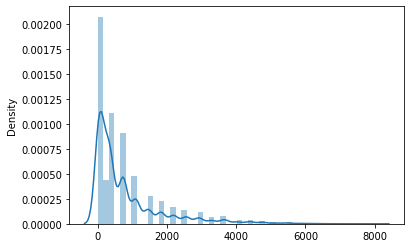

In [93]:
#check distribution of age
sns.distplot(x = df_merge['age_upon_intake'])

<AxesSubplot:xlabel='animal_type', ylabel='age_upon_intake'>

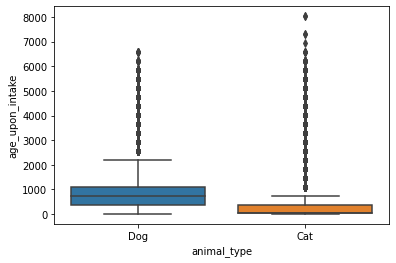

In [94]:
sns.boxplot(x = df_merge['animal_type'], y = df_merge['age_upon_intake'])

Age feature distribution in skewed as per normality. Median is around 500 days and most of the animals age fall under 1000 days. There are outliers data points as well after 2000. Cats age are lesser than dogs age mostly. Also, more outliers in cat than dog.

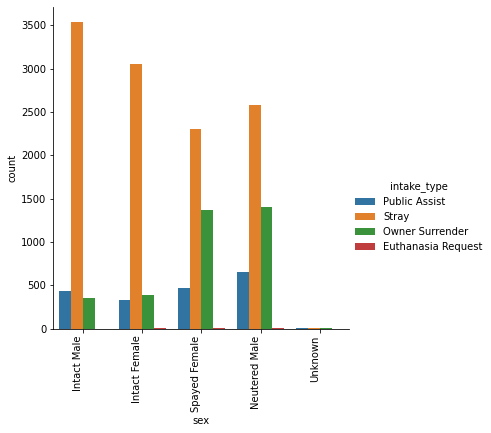

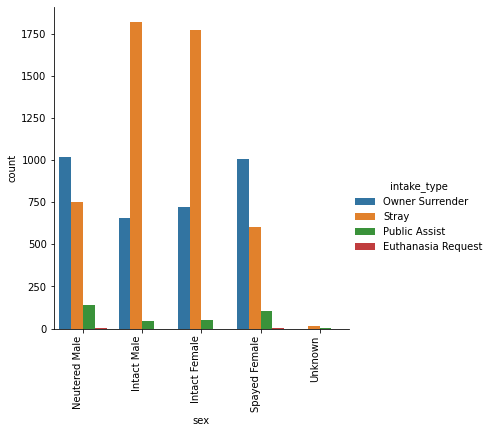

In [95]:
#check the distribution of animals sex and intake type in the dataset

df_dog = df_merge[(df_merge['animal_type'] == 'Dog') & (df_merge['adoption_in_month'] == 1)]
df_cat = df_merge[(df_merge['animal_type'] == 'Cat') & (df_merge['adoption_in_month'] == 1)]

dogs_plot = sns.catplot(x='sex', data=df_dog, kind='count', hue = 'intake_type')
dogs_plot.set_xticklabels(rotation=90, horizontalalignment='right')

cats_plot = sns.catplot(x='sex', data=df_cat, kind='count', hue = 'intake_type')
cats_plot.set_xticklabels(rotation=90, horizontalalignment='right')

In case of dogs, most were stray for all intake types. Also, owner surrendered for spayed female and neutered males significantly.
In case of cats, most of the cats were surrendred by owners in case of spayed female and neutered males. However, mostly cats were also stray.
Most of the dogs - cats are stray or surrendred by the owner.

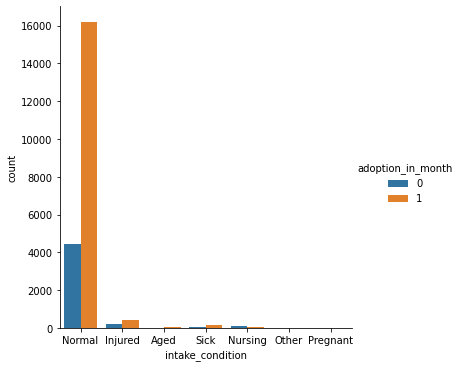

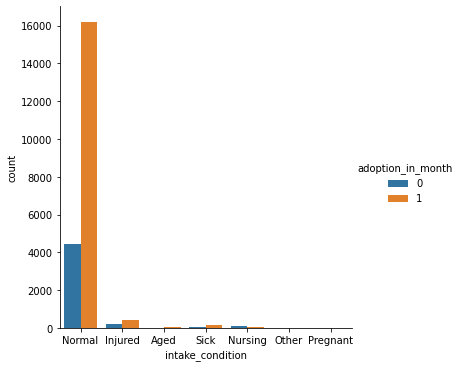

In [96]:
df_dog = df_merge[(df_merge['animal_type'] == 'Dog')]
df_cat = df_merge[(df_merge['animal_type'] == 'Cat')]

ogs_plot = sns.catplot(x='intake_condition', data=df_dog, kind='count', hue = 'adoption_in_month')
dogs_plot.set_xticklabels(rotation=90, horizontalalignment='right')

ogs_plot = sns.catplot(x='intake_condition', data=df_dog, kind='count', hue = 'adoption_in_month')
dogs_plot.set_xticklabels(rotation=90, horizontalalignment='right')

By majority, normal condition animals have greater chances to get adopted in a month significantly.

In [97]:
#as per visualization, removing all the outliers

df_merge = df_merge[df_merge['age_upon_intake'] < 2000]
df_merge = df_merge[df_merge['sex'] != 'Unknown']
df_merge = df_merge[df_merge['intake_type'] != 'Euthanasia Request']
df_merge = df_merge[df_merge['intake_condition'].isin(['Normal','injured'])]

df_merge.shape

(30210, 8)

In [98]:
df_merge.adoption_in_month.value_counts()

1    21451
0     8759
Name: adoption_in_month, dtype: int64

As we got an imbalanced dataset that can cause biased results or poor performance for the model. We need to re sample the dataset to make it a balanced dataset. We will apply SMOTE algorithm to handle this issue further.

<b>Data Modelling:

In [99]:
#one-hot encoding for nominal features
df_merge = pd.get_dummies(df_merge, drop_first=True)

In [100]:
df_merge.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30210 entries, 5 to 95406
Data columns (total 72 columns):
 #   Column                           Non-Null Count  Dtype
---  ------                           --------------  -----
 0   age_upon_intake                  30210 non-null  int32
 1   adoption_in_month                30210 non-null  int64
 2   animal_type_Dog                  30210 non-null  uint8
 3   breed_Australian Cattle Dog Mix  30210 non-null  uint8
 4   breed_Australian Shepherd Mix    30210 non-null  uint8
 5   breed_Border Collie Mix          30210 non-null  uint8
 6   breed_Boxer Mix                  30210 non-null  uint8
 7   breed_Catahoula Mix              30210 non-null  uint8
 8   breed_Chihuahua Shorthair Mix    30210 non-null  uint8
 9   breed_Dachshund Mix              30210 non-null  uint8
 10  breed_Domestic Longhair          30210 non-null  uint8
 11  breed_Domestic Longhair Mix      30210 non-null  uint8
 12  breed_Domestic Medium Hair       30210 non-nul

In [101]:
move_outcome_column = df_merge.pop('adoption_in_month')
df_merge.insert(0, move_outcome_column.name, move_outcome_column)
df_merge.head()

,adoption_in_month,age_upon_intake,animal_type_Dog,breed_Australian Cattle Dog Mix,breed_Australian Shepherd Mix,breed_Border Collie Mix,breed_Boxer Mix,breed_Catahoula Mix,breed_Chihuahua Shorthair Mix,breed_Dachshund Mix,...,color_White/Black,color_White/Brown,color_White/Brown Tabby,color_White/Tan,color_Yellow,intake_type_Public Assist,intake_type_Stray,sex_Intact Male,sex_Neutered Male,sex_Spayed Female
5,1,730,1,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,1,0,0
7,1,150,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
9,1,120,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,1,0,0
16,0,28,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
17,1,30,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0


In [102]:
#splitting data into training and testing set
X, y = df_merge.iloc[:, 1:].values, df_merge.iloc[:, 0].values
X_train, X_test, y_train, y_test =\
    train_test_split(X, y, 
                     test_size=0.3, 
                     random_state=1, 
                     stratify=y) 

#using smote for imbalance issue in the dataset
sm = SMOTE(random_state = 2) 
X_train_res, y_train_res = sm.fit_sample(X_train, y_train.ravel()) 
X_train_res.shape

(30032, 71)

In [103]:
#we need to standardize our dataset
from sklearn.preprocessing import StandardScaler
std_scale = StandardScaler()
X_train_std = std_scale.fit_transform(X_train_res)

In [104]:
#fitting gaussian naive bayes algorithm classifier

model = GaussianNB()
model.fit(X_train_std,y_train_res)
gausianNB_predicted = model.predict(X_test)

print('\nconfusion_matrix from Gaussian naive bayes:')
print(confusion_matrix( y_test, gausianNB_predicted ) )

accuracy = accuracy_score(y_test, gausianNB_predicted)
print('accuracy = ' + str(accuracy))


confusion_matrix from Gaussian naive bayes:
[[1114 1514]
 [ 670 5765]]
accuracy = 0.7590201919894075


<b>Conclusion:

Naive bayes classifier gave ~76% accuracy. So, we can further improve the accuracy of by using feature selection methods, hyperparameter tuning and different sampling methods.For an Naive Bayes classifier, categorical values are the easiest to deal with as it uses probability for doing its predictive analysis, so we got a fair accuracy score.
Also, the data was normally scaled that helped the gaussian naive bayes algorithm to perform well. So, we can predict a month adoption with given factors significantly.